# A New Parametrization of Correlation Matrices
## Marseille June 14, 2022: Lecture 1

In [7]:
#import Pkg; Pkg.add("ColorSchemes")
using Plots
using LinearAlgebra
using Latexify
using ColorSchemes

# Part A: Fisher Transformation

In [8]:
# Fisher tranformation
function Fisher(r)
    log((1+r)/(1-r))/2
end

Fisher (generic function with 1 method)

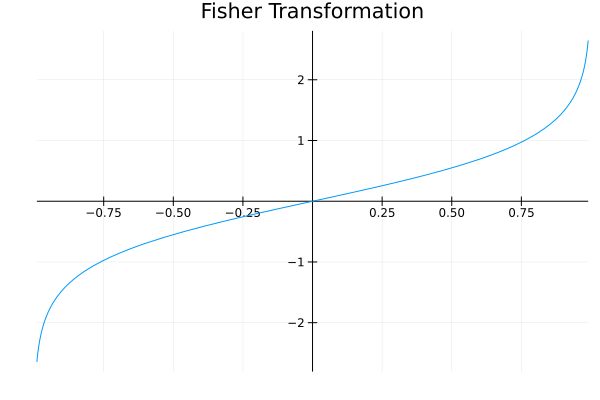

In [9]:
plot(r->Fisher(r),xlims=(-.99,.99),legend=:none,title="Fisher Transformation",framestyle = :origin)

In [10]:
# Inverse Fisher tranformation
function rehsiF(z)
    (exp(2*z)-1)/(exp(2*z)+1)
end

rehsiF (generic function with 1 method)

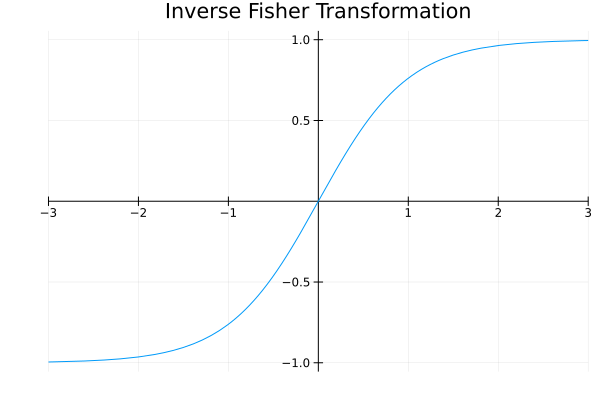

In [11]:
plot(z->rehsiF(z),xlims=(-3,3),legend=:none,title="Inverse Fisher Transformation",framestyle = :origin)

# Part B: Correlation matrix from a vector, $C(\gamma)$

# Matrix Logarithm of a correlation matrix, $C$
Eigendecomposition of $C$

$$ C= Q\Lambda Q'\qquad \text{with}\qquad Q'Q=I\quad \text{and}\quad \Lambda = \mathrm{diag}(\lambda_1,\ldots,\lambda_n).$$ 

The matrix logarithm of $C$ can be defined by:

$$\log(C)=Q\log(\Lambda) Q'.$$

# Fisher Transformation and Matrix Logarithm (2x2 case)
$$ 
\log C = 
\log\left[
    \begin{array}{cc}
        1    & \rho\\
        \rho & 1 
    \end{array}
    \right] 
= 
\log\left[
    \begin{array}{cc}
        \frac{1}{2}\log(1-\rho^2)            & \color{red}{\frac{1}{2}\log\frac{1+\rho}{1-\rho}}\\
        \color{red}{\frac{1}{2}\log\frac{1+\rho}{1-\rho} }& \frac{1}{2}\log(1-\rho^2)
    \end{array}
    \right].
$$

## Basic idea for general case: $(n > 2)$

$$ 
\log C = \left[
    \begin{array}{cccc}
        x_1            & \color{red}{\gamma_{1,2}} & \cdots & \color{red}{\gamma_{1,n}}\\
        \color{red}{\gamma_{1,2}} & x_2 & \ddots & \vdots \\
\vdots & \ddots & &\color{red}{\gamma_{n-1,n}}\\
\color{red}{\gamma_{1,n}} & \cdots & \color{red}{\gamma_{n-1,n}} & x_n
\end{array}\right].
$$


## New Parametrization (Archakov and Hansen, 2021)

Vector parametrization:
$$ 
\gamma = g(C) = \mathrm{vecl}\log C = \left[
    \begin{array}{c}
        \color{red}{\gamma_{1,2}}\\ 
        \color{red}{\gamma_{1,3}}\\
        \vdots \\
        \color{red}{\gamma_{1,n}}\\ 
        \color{red}{\gamma_{2,3}}\\
        \vdots \\
        \color{red}{\gamma_{n-1,n}}
\end{array}\right] \in \mathbb{R}^d,\qquad d=n(n-1)/2.
$$

One-to-one transformation. 

$\bullet$ Any non-singular $C$ maps to a unique vector $\gamma(C) \in \mathbb{R}^d$. 

$\bullet$ Any vector $\gamma \in \mathbb{R}^d$ maps to a unique $n\times n$ correlation matrix, $C=g^{-1}(\gamma)$.

# Inverse mapping $g^{-1}(\gamma)$

Problem: Determine $x\in\mathbb{R}^n$ such that

$$ \exp(G[x])$$

is a correlation matrix, where

$$ 
G[x] = \left[
    \begin{array}{cccc}
        x_1            & \color{red}{\gamma_{1,2}} & \cdots & \color{red}{\gamma_{1,n}}\\
        \color{red}{\gamma_{1,2}} & x_2 & \ddots & \vdots \\
\vdots & \ddots & &\color{red}{\gamma_{n-1,n}}\\
\color{red}{\gamma_{1,n}} & \cdots & \color{red}{\gamma_{n-1,n}} & x_n
\end{array}\right].
$$

The matrix, $ \exp(G[x])$, is guarenteed to be positive definite. All we need is that diagonal elements, $\mathrm{diag}(e^{G[x^{(h)}]})$, are all equal to one.

Hence, elementwise log to $\mathrm{diag}(e^{G[x^{(h)}]})$ should be all zeros.

## Contraction Algorithm
$$
x^{(h+1)} = x^{(h)} - \log.\mathrm{diag}(e^{G[x^{(h)}]}),\qquad h = 0,1,\ldots.
$$

In [6]:
function GFTstep!(G,Δx)   # the "!" is important for speed. So is "." in code below. Modifying memory
    Δx .= log.(diag(exp(G)))
    for i∈1:length(Δx)
        G[i,i] -= Δx[i]   # update diagonal elements
    end
end

GFTstep! (generic function with 1 method)

In [7]:
G = [ 0  -0.2 0.5;
     -0.2 0   0.7;
      0.5 0.7 0  ]

3×3 Matrix{Float64}:
  0.0  -0.2  0.5
 -0.2   0.0  0.7
  0.5   0.7  0.0

In [8]:
exp(G)

3×3 Matrix{Float64}:
  1.13009    -0.0395539  0.490013
 -0.0395539   1.25781    0.737104
  0.490013    0.737104   1.36956

In [9]:
Δx = diag(G)
GFTstep!(G,Δx)
exp(G)

3×3 Matrix{Float64}:
  0.993486  -0.039511  0.393902
 -0.039511   0.994763  0.560435
  0.393902   0.560435  1.01094

## Let's automate the algorithm

In [10]:
function GFT(G, ϵ::Float64 = 1e-12)
    n = size(G,1)
    δ = Inf; N = -1; Δx = ones(n,1)   # initialize
    while δ > sqrt(n)*ϵ
        GFTstep!(G,Δx)                # GFTstep updated diagonal of A, the
        δ = norm(Δx)                  # convergence is defined by δ
        N = N + 1
    end
    return Symmetric(exp(G)), N
end
C,N = GFT(G)
C

3×3 Symmetric{Float64, Matrix{Float64}}:
  1.0        -0.0406434  0.392774
 -0.0406434   1.0        0.558645
  0.392774    0.558645   1.0

In [11]:
log(C)

3×3 Symmetric{Float64, Matrix{Float64}}:
 -0.115138  -0.2        0.5
 -0.2       -0.222925   0.7
  0.5        0.7       -0.327165

In [12]:
# Some random 40x40 symmetric matrix
n=40
G = (randn(n,n) .+ 0.33)./sqrt(n)
for i=1:n-1, j=i+1:n
    G[i,j] = G[j,i]
end
latexify(G; fmt = "%.2f")

"\\begin{equation}\n\\left[\n\\begin{array}{cccccccccccccccccccccccccccccccccccccccc}\n0.07 & 0.04 & 0.04 & 0.03 & -0.20 & -0.08 & 0.29 & 0.09 & 0.37 & 0.23 & 0.22 & 0.04 & -0.02 & 0.15 & 0.11 & -0.13 & -0.08 & 0.08 & -0.21 & -0.19 & 0.22 & 0.24 & 0.30 & 0.01 & -0.09 & -0.29 &" ⋯ 11407 bytes ⋯ " & 0.04 & 0.03 & 0.11 & 0.17 & 0.02 & 0.08 & -0.07 & -0.30 & 0.12 & 0.14 & -0.00 & -0.06 & 0.07 & 0.23 & -0.30 & -0.10 & -0.06 & -0.19 & 0.23 & -0.08 & 0.01 & 0.13 & 0.15 & -0.00 & -0.01 & -0.08 & 0.21 & 0.08 & -0.20 & 0.33 & 0.02 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [13]:
C,N = GFT(G)
latexify(C; fmt = "%.2g") 

"\\begin{equation}\n\\left[\n\\begin{array}{cccccccccccccccccccccccccccccccccccccccc}\n1 & 0.087 & 0.16 & 0.17 & -0.11 & 0.039 & 0.18 & 0.27 & 0.37 & 0.2 & 0.21 & 0.19 & 0.1 & 0.2 & 0.11 & 0.02 & 0.019 & 0.14 & -0.0012 & -0.085 & 0.26 & 0.26 & 0.33 & 0.057 & 0.0084 & -0.14 & -" ⋯ 11488 bytes ⋯ "38 & 0.031 & 0.19 & 0.19 & 0.1 & 0.12 & -0.001 & -0.16 & 0.17 & 0.24 & -0.037 & -0.0057 & 0.15 & 0.2 & -0.17 & 0.026 & -0.059 & -0.16 & 0.26 & -0.12 & -0.0043 & 0.16 & 0.095 & 0.049 & 0.021 & 0.044 & 0.23 & 0.21 & -0.14 & 0.23 & 1 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [14]:
N

20

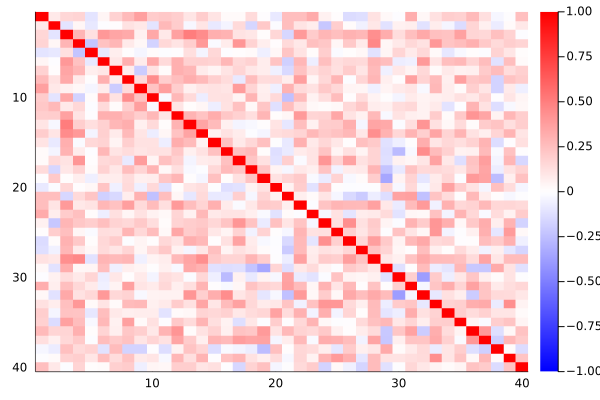

In [15]:
#import Pkg; Pkg.add("ColorSchemes")
using ColorSchemes
heatmap(C,  c = :bwr, clims=(-1,1), yflip=:true)